# Version 3.0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
from transformers import pipeline, AutoTokenizer, logging

# Suppress unnecessary warnings from the transformers library
logging.set_verbosity_error()

# Step 1: Load the dataset
file_path = 'combined_amazon_reviews.csv'
data = pd.read_csv(file_path, low_memory=False)




In [4]:
# Step 2: Drop rows with missing or empty review text
data.dropna(subset=['reviews.text'], inplace=True)  # Drop rows where review text is NaN
data = data[data['reviews.text'].str.strip() != '']  # Drop rows where review text is empty


In [5]:
# For simplicity, use a subset for testing
data = data[['reviews.text']].head(1000)  # Adjust as needed for testing


In [6]:
# Step 3: Load the tokenizer and sentiment analysis model

#model_name = "distilbert-base-uncased"  # You can use another pre-trained model if you prefer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
# Step 4: Define a function to process and debug the sentiment analysis
def get_sentiment(review):
    try:
        # Tokenize and truncate the text
        tokens = tokenizer(review, truncation=True, max_length=512, return_tensors="pt")
        # Get sentiment prediction
        result = sentiment_analysis(tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))
        
        # Print full model output for debugging
        print(f"Full Model Output for Review: {review}\n{result}")
        
        # Extract label from model output
        label = result[0]['label']
        
        
        return(label)
    except Exception as e:
        print(f"Error processing review: {review}\nError: {str(e)}")
        return "None"

# Code that works

In [8]:
# Step 5: Apply the sentiment analysis model to each review and map the labels
data['sentiment'] = data['reviews.text'].apply(get_sentiment)

Full Model Output for Review: I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
[{'label': 'negative', 'score': 0.9205968976020813}]
Full Model Output for Review: Bulk is always the less expensive way to go for products like these
[{'label': 'neutral', 'score': 0.6053089499473572}]
Full Model Output for Review: Well they are not Duracell but for the price i am happy.
[{'label': 'positive', 'score': 0.7650973796844482}]
Full Model Output for Review: Seem to work as well as name brand batteries at a much better price
[{'label': 'positive', 'score': 0.8743552565574646}]
Full Model Output for Review: These batteries are very long lasting the price is great.
[{'label': 'positive', 'score': 0.9762579798698425}]
Full Model Output for Review: Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basi

In [9]:
# Step 6: Display the results
print(data[['reviews.text', 'sentiment']].head())

                                        reviews.text sentiment
0  I order 3 of them and one of the item is bad q...  negative
1  Bulk is always the less expensive way to go fo...   neutral
2  Well they are not Duracell but for the price i...  positive
3  Seem to work as well as name brand batteries a...  positive
4  These batteries are very long lasting the pric...  positive


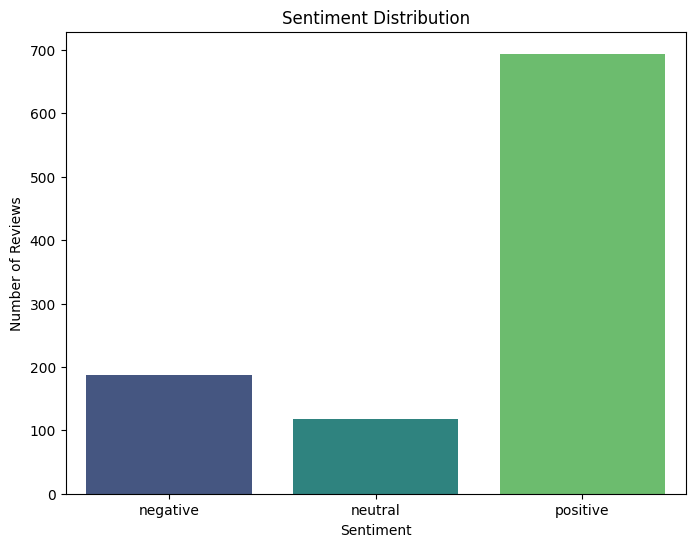

In [10]:
# Step 7: Visualize sentiment distribution using countplot (corrected)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='viridis', hue='sentiment', dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


# Asking the user input to generative a robo review

In [16]:
from transformers import pipeline

# Step 1: Initialize GPT-2 text generation model pipeline
review_generation_pipeline = pipeline("text-generation", model="gpt2")

# Step 2: Function to generate a natural review using GPT-2
def generate_natural_review(product, category, sentiment):
    # Construct a starting prompt based on product, category, and sentiment
    prompt = f"I bought the {product} in the {category} category and it was"
    
    # Adjust prompt based on the desired sentiment
    if sentiment == "Positive":
        prompt += " absolutely amazing. I loved it because"
    elif sentiment == "Negative":
        prompt += " quite disappointing. I was not happy because"
    elif sentiment == "Neutral":
        prompt += " fine but nothing special. It worked as expected but"
    
    # Generate the review using GPT-2 with a prompt
    generated_review = review_generation_pipeline(prompt, max_length=100, num_return_sequences=1)[0]['generated_text']
    
    return generated_review

# Step 3: Get user input for product, category, and desired sentiment
product_name = input("Enter the product name: ")
category = input("Enter the product category: ")
sentiment_choice = input("Enter the desired sentiment (Positive, Negative, Neutral): ").capitalize()

# Step 4: Generate the review based on the input and GPT-2
generated_review = generate_natural_review(product_name, category, sentiment_choice)

# Step 5: Display the generated review
print(f"Generated Review: {generated_review}")


Generated Review: I bought the Iphone 14 Pro in the Smartphone category and it was absolutely amazing. I loved it because it has the new camera as well as a lot of buttons that you can do with the phone. I couldn't wait to try other I-phones out to see if it would work.

Read more
